In [1]:
%matplotlib inline
import numpy as np
import lib.io.stan
import lib.plots.stan
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D
import retro_prepare
import matplotlib.colors

In [2]:
! ls /Users/huifang.wang/RetrospectiveData/Retro/datasets/id010_cmn/

elec         patient.xlsx seeg         tvb


In [3]:
#patient_id = 'id001_bt'
patient_id = 'id003_mg'
patient_id = 'id010_cmn'
#patient_id = 'id017_mk'
data_dir = f'/Users/huifang.wang/RetrospectiveData/Retro/datasets/{patient_id}'
results_dir = f'/Users/huifang.wang/RetrospectiveData/Retro/results/{patient_id}'
#szr_name = 'BF_crise1P_110831B-CEX_0004'
#szr_name = 'BF_crise1P_110831B-CEX_0004'
#szr_name = "MK_crise1Part1_170328C-BEX_0004_MK_crise1Part2_170328C-BEX_0007"
#szr_name = "MK_crise2_PSG_170328C-CEX_0002"
#szr_name = 'BTcrise2appportable_0013'
#szr_name = 'BTcrise1appportable_0006'
szr_name = 'CMN_crise3P_140320b-bex_0003'
meta_data_fname = f'{szr_name}.json'
#raw_seeg_fname = f'{szr_name}.raw.fif'
fname_suffix = f'{szr_name}'
# if os.path.isdir(results_dir):
#     os.rmdir(results_dir)
#os.makedirs(results_dir,exist_ok=True)
#os.makedirs(f'{results_dir}/logs',exist_ok=True)
#os.makedirs(f'{results_dir}/figures',exist_ok=True)
#os.makedirs(f'{results_dir}/Rfiles', exist_ok=True)

In [4]:
hpf = 10
lpf = 0.02
raw_seeg_fname = f'{szr_name}.raw.fif'
#data_mono = retro_prepare_data.prepare_data(data_dir, meta_data_fname, raw_seeg_fname, szr_name, hpf, lpf)
#raw_seeg_fname = f'{szr_name}.bip.raw.fif'
data = retro_prepare.prepare_data_bip(data_dir, meta_data_fname, raw_seeg_fname, szr_name, hpf, lpf)
seeg, bip = retro_prepare.read_one_seeg(data_dir, meta_data_fname, raw_seeg_fname)

Isotrak not found


Isotrak not found


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
def read_vep_mrtrix_lut():
    roi_names = []
    with open('./data/VepMrtrixLut.txt', 'r') as fd:
        for line in fd.readlines():
            i, roi_name, *_ = line.strip().split()
            roi_names.append(roi_name)
            #roi_name_to_index[roi_name.lower()] = int(i) - 1
    return roi_names
roi = read_vep_mrtrix_lut()
roi=roi[1:]

In [15]:
import json

with open(f'data/ei-vep.json','r') as f:
        ezh_all = json.load(f)

In [78]:
roi_sel=['Right-Hippocampus-anterior','Right-Hippocampus-posterior']

ind_Fp_elec = []
for idroi, iroi in enumerate(roi_sel):

    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if roi[indroi_iv]== iroi:
            print(ibip_elec, ': ', roi[indroi_iv])
            ind_Fp_elec.append(bip.ch_names.index(ibip_elec))
    

TB1-2 :  Right-Hippocampus-anterior
TB4-5 :  Right-Hippocampus-anterior
B1-2 :  Right-Hippocampus-anterior
B2-3 :  Right-Hippocampus-anterior
B4-5 :  Right-Hippocampus-anterior
B5-6 :  Right-Hippocampus-anterior
B6-7 :  Right-Hippocampus-anterior
B3-4 :  Right-Hippocampus-posterior
C1-2 :  Right-Hippocampus-posterior
C2-3 :  Right-Hippocampus-posterior
C3-4 :  Right-Hippocampus-posterior
C4-5 :  Right-Hippocampus-posterior
C5-6 :  Right-Hippocampus-posterior


In [31]:
ind_ez_elec = []
for idroi, iroi in enumerate(ezh_all[patient_id]['i_ez']):
    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if iroi == indroi_iv:
            print(ibip_elec, ': ', roi[indroi_iv])
            ind_ez_elec.append(bip.ch_names.index(ibip_elec))
ind_pz_elec = []
for idroi, iroi in enumerate(ezh_all[patient_id]['i_pz']):
    for ibip_elec, indroi_iv in zip(bip.ch_names,np.argmax(data['gain'],axis=1)):
        if iroi == indroi_iv:
            print(ibip_elec, ': ', roi[indroi_iv])
            ind_pz_elec.append(bip.ch_names.index(ibip_elec))
            
#m_ez = np.array([_ in ez_contacts_ for _ in bip.ch_names])

TB'1-2 :  Left-Hippocampus-anterior
TB'3-4 :  Left-Hippocampus-anterior
TB'4-5 :  Left-Hippocampus-anterior
TB'5-6 :  Left-Hippocampus-anterior
B'1-2 :  Left-Hippocampus-anterior
B'3-4 :  Left-Hippocampus-anterior
A'1-2 :  Left-Hippocampus-anterior
TB'2-3 :  Left-Amygdala
A'2-3 :  Left-Amygdala
A'5-6 :  Left-Amygdala
B'2-3 :  Left-Hippocampus-posterior
C'1-2 :  Left-Hippocampus-posterior
C'2-3 :  Left-Hippocampus-posterior
C'3-4 :  Left-Hippocampus-posterior
TP'1-2 :  Left-Temporal-pole
TP'2-3 :  Left-Temporal-pole
TP'4-5 :  Left-Temporal-pole
TP'5-6 :  Left-Temporal-pole
TP'6-7 :  Left-Temporal-pole


In [79]:
indepz=ind_ez_elec + ind_pz_elec + ind_Fp_elec

ind_nch=np.arange(0,len(bip.ch_names),5)

nch = indepz + list(set(ind_nch) - set(indepz))

nch.sort()

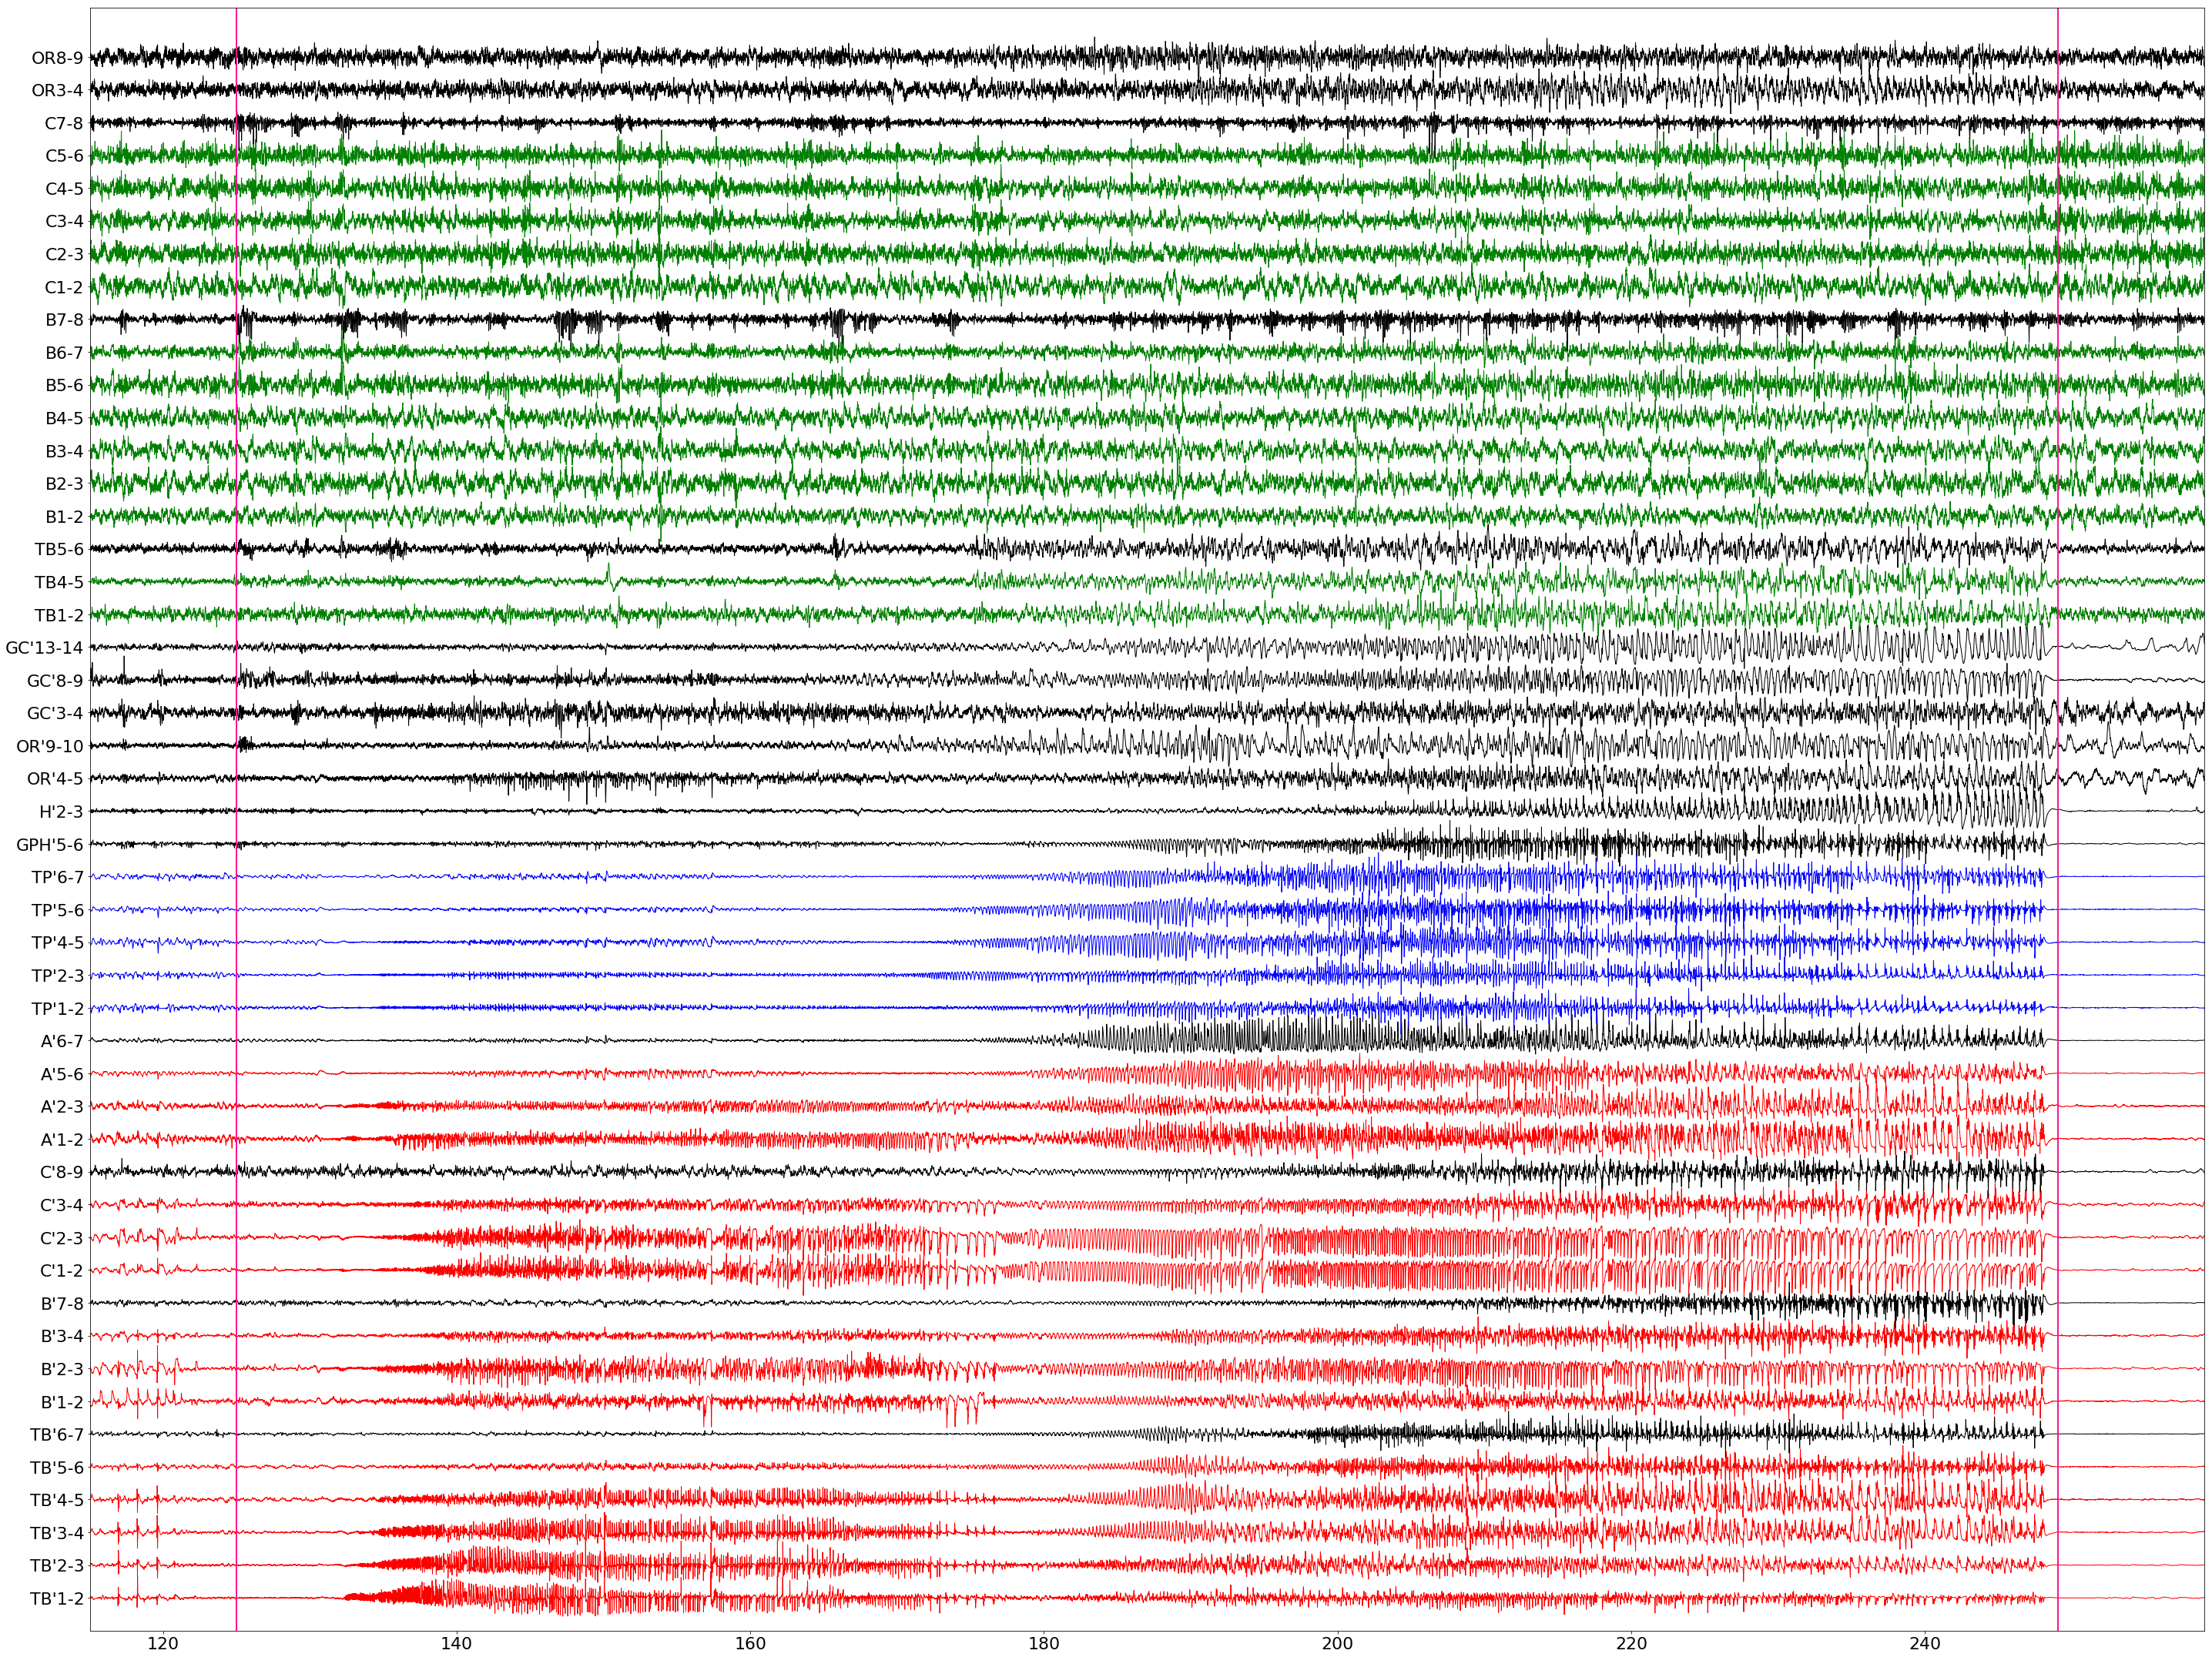

In [88]:
ts = 10
base_length = int(seeg['sfreq']*ts)

start_idx = int(seeg['onset'] * seeg['sfreq']) - base_length
end_idx = int(seeg['offset'] * seeg['sfreq']) + base_length
y = bip.get_data().T[start_idx:end_idx].T
t = bip.times[start_idx:end_idx]

figure(figsize=[40,30])
scaleplt=1.4
Ty=np.arange(np.shape(y[0])[0])
show_ch=[]
for ind, ich in enumerate(nch):
    if ich in ind_ez_elec:
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'red', lw=1);
    elif ich in ind_pz_elec:
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'blue', lw=1);
    elif ich in ind_Fp_elec:
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'green', lw=1);
    else: 
        plt.plot(t, scaleplt*y[ich]/np.ptp(y[ich]) + ind, 'black', lw=1);
    
    show_ch.append(bip.ch_names[ich])
plt.yticks(np.arange(len(show_ch)),show_ch, fontsize=22);


plt.xticks(fontsize=22)
plt.ylim([-1,len(nch)+0.5])
plt.xlim([t[0],t[-1]])
plt.axvline(seeg['onset'], color='DeepPink', lw=2)
plt.axvline(seeg['offset'],color='DeepPink', lw=2)
plt.tight_layout()
plt.savefig(f'{results_dir}/figures/ts_{patient_id}_{szr_name}_bf.png')

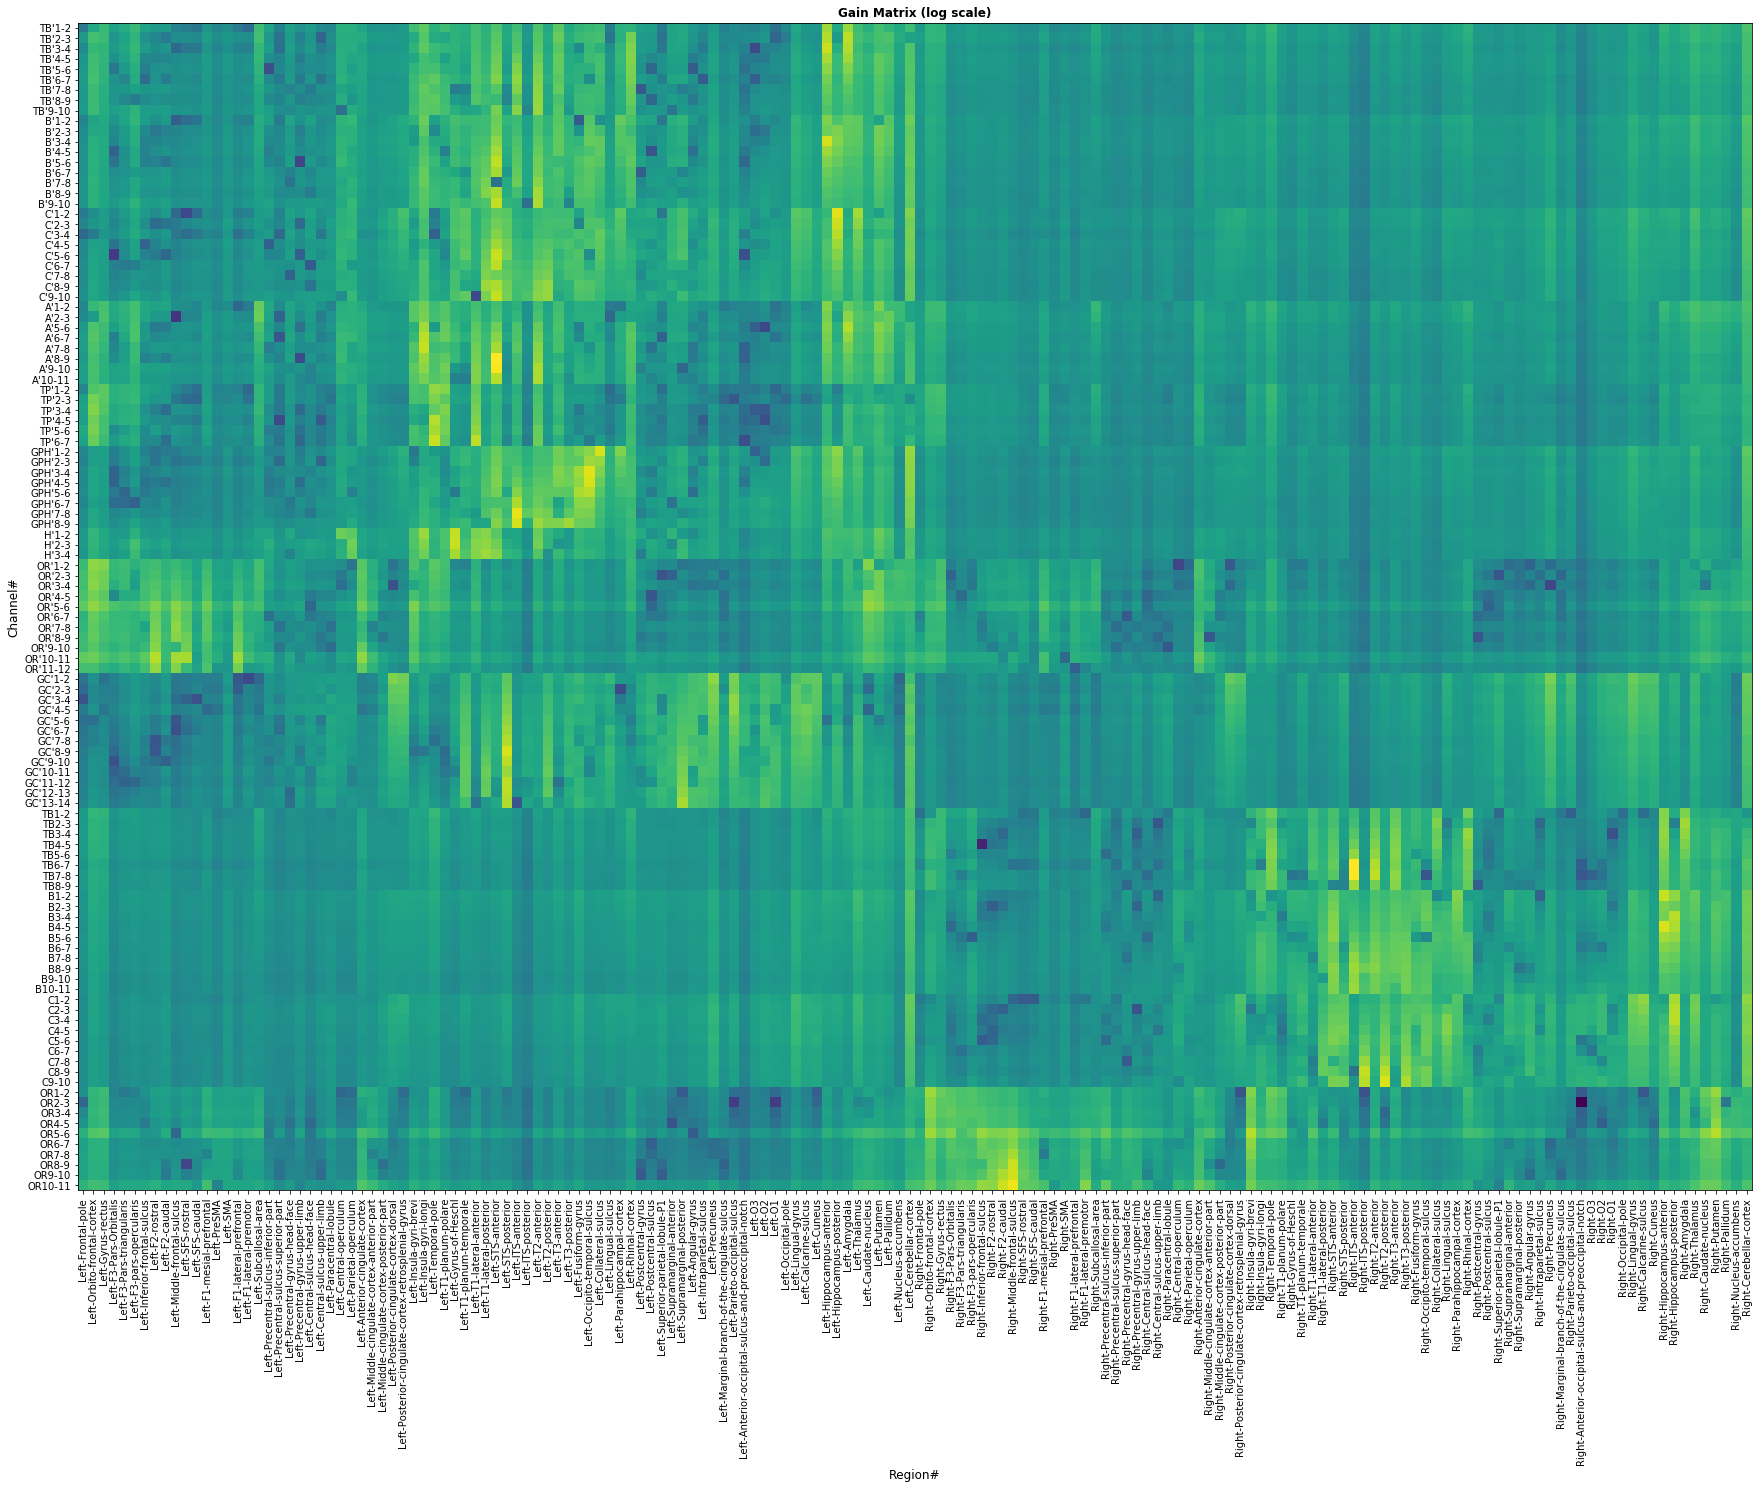

In [12]:
plt.figure(figsize=(30,30))
#plt.subplot(122)
plt.imshow(data['gain'],norm=matplotlib.colors.LogNorm(vmin=data['gain'].min(), vmax=data['gain'].max()));
#plt.colorbar(fraction=0.046,pad=0.04);
plt.xticks(np.r_[:len(roi)], roi, rotation = 90);
plt.yticks(np.r_[:len(bip.ch_names)], bip.ch_names);
plt.xlabel('Region#', fontsize=12);
plt.ylabel('Channel#', fontsize=12);
plt.title('Gain Matrix (log scale)',fontsize=12, fontweight='bold');
plt.savefig(f'{results_dir}/figures/{patient_id}_gainMatrix.png')